<a href="https://colab.research.google.com/github/CarolBigData2016/google-colab/blob/master/01TF_CH4_3_intro_to_tensorflow_times_a_million.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (Introduction to Tensorflow) * 10^6

In this notebook, we modify the [tensor-fied intro to TensorFlow notebook](https://github.com/the-deep-learners/TensorFlow-LiveLessons/blob/master/notebooks/tensor-fied_intro_to_tensorflow.ipynb) to use placeholder tensors and feed in data from a data set of millions of points. This is a derivation of Jared Ostmeyer's [Naked Tensor](https://github.com/jostmey/NakedTensor/) code. 

In [1]:
import numpy as np
np.random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
tf.set_random_seed(42)

In [0]:
xs = np.linspace(0., 8., 8000000) # eight million points spaced evenly over the interval zero to eight, can be created with np.linspace method.
ys = 0.3*xs-0.8+np.random.normal(scale=0.25, size=len(xs)) # eight million labels given xs, m=0.3, b=-0.8, plus normally-distributed noise

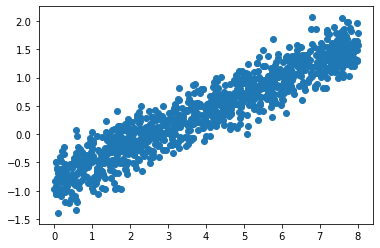

In [13]:
fig, ax = plt.subplots()
data_subset = pd.DataFrame(list(zip(xs, ys)), columns=['x', 'y']).sample(n=1000) # sample some 1000 points for plotting, since 8 million points will be too many
_ = ax.scatter(data_subset.x, data_subset.y)

In [0]:
m = tf.Variable(-0.5)
b = tf.Variable(1.0)

In [0]:
batch_size = 8 # sample mini-batches of size eight for each step of gradient descent

#### Define *placeholder tensors* of length *batch_size* whose values will be filled in during graph execution

In [0]:
xs_placeholder = tf.placeholder(tf.float32, [batch_size])
ys_placeholder = tf.placeholder(tf.float32, [batch_size])

#### Define graph that incorporates placeholders

In [0]:
ys_model = m*xs_placeholder+b
total_error = tf.reduce_sum((ys_placeholder-ys_model)**2)

In [0]:
optimizer_operation = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(total_error) # demo 0.01, 0.0001

In [0]:
initializer_operation = tf.global_variables_initializer()

#### Sample from the full data set while running the session

In [0]:
with tf.Session() as session:
    
    session.run(initializer_operation)
    
    n_batches = 1000 # 10, then 1000
    for iteration in range(n_batches):
        random_indices = np.random.randint(len(xs), size=batch_size) # sample the batch by random selection
        feed = { # feeds are dictionaries
            xs_placeholder: xs[random_indices],
            ys_placeholder: ys[random_indices]
        }
        session.run(optimizer_operation, feed_dict=feed) # minimize cost with the mini-batch
    
    slope, intercept = session.run([m, b])

In [11]:
slope

0.30601835

In [12]:
intercept

-0.77169347